In [322]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.path as mpltpath

from PIL import Image
from scipy.spatial import Delaunay
from scipy.spatial import voronoi_plot_2d, Voronoi
from skimage import draw

In [904]:
# source_img = cv2.imread('./images/inputs/andrew.jpg')
img = cv2.imread('./images/inputs/cat.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/inputs/andrew.jpg')
# img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [623]:
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select key matching points in the image')
    plt.axis('off')
    plt.imshow(img)
    H, W, C = img.shape
    clicked = [[0, 0], [0, W-1], [H-1, 0], [H-1, W-1]]
    result = [1]
    
    def on_mouse_pressed(event, ps):
        x = round(event.xdata)
        y = round(event.ydata)
    #         plt.plot(x, y, 'ro')
        plt.clf()
        plt.imshow(img)
        ps.append([x, y])
        points = np.array(ps)
        triangulation = Delaunay(points)
        result[0] = triangulation
    #         plot_triangulation(img, clicked, triangulation)
    #         v = Voronoi(ps)
        plt.triplot(points[:,0], points[:,1], triangulation.simplices, c='r')
#         triang = tri.Triangulation(points[:,0], points[:,1])
#         plt.triplot(triang, c='r')
        plt.plot(points[:,0], points[:,1], 'ro')
        
    fig.canvas.mpl_connect('button_press_event', lambda event: on_mouse_pressed(event, clicked))

    return clicked, result

In [871]:
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

def get_mask(triangle, img):
    ys = triangle[:,1]
    xs = triangle[:,0]
    mask = poly2mask(ys, xs, img.shape[:2])
#     fig = plt.figure()
#     plt.imshow(np.uint8(mask), cmap='gray')
    return mask

<IPython.core.display.Javascript object>


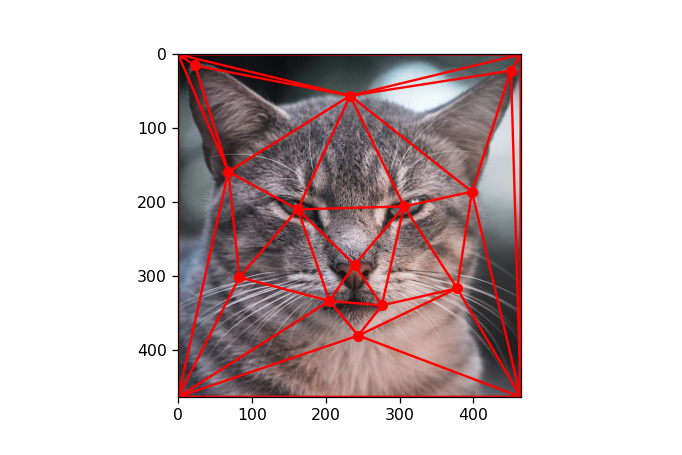

In [753]:
%matplotlib notebook
points, triang = specify_points(img)
# %matplotlib inline

<IPython.core.display.Javascript object>


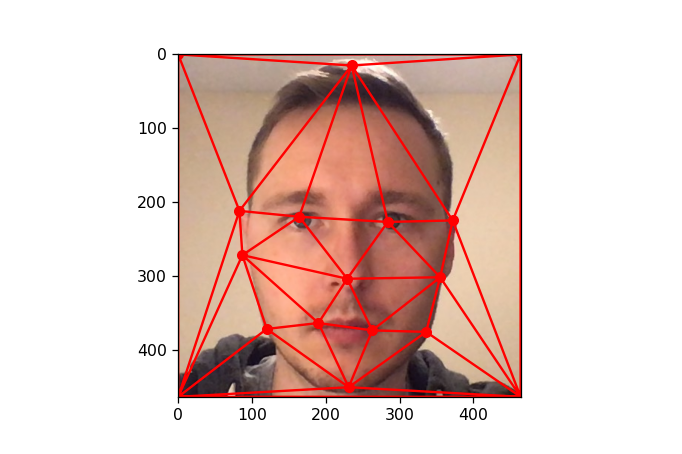

In [754]:
%matplotlib notebook
points_2, triang2 = specify_points(img2)

In [906]:
len(points)==len(points_2)

True

In [907]:
if __name__ == '__main__':
    import utils
    points = np.array(points)
    points_2 = np.array(points_2)
    test = triang[0].simplices
    test2 = triang2[0].simplices
    duration = 3 # in seconds
    fps = 30
    num_frames = duration * fps
    pool = Pool()
    results = []
    positions = np.zeros(img.shape[:2],dtype=np.ndarray)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            positions[y,x]=[x,y]
    ori_tris = points[test]
    new_tris = points_2[test]
    ori_img = img
    new_img = img2
    argument = [(ori_tris, new_tris, frame_num / num_frames, ori_img,new_img,positions,frame_num, 'test3') for frame_num in range(0, num_frames)]

    result = pool.starmap(utils.generate_imgs, argument)
    print("here")

here


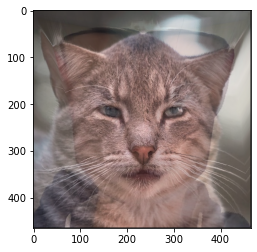

In [898]:
plt.imshow(result)

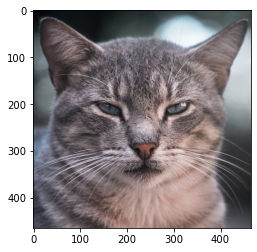

In [832]:
plt.imshow(img)